#Histogram manipulation, Color spaces, Classification

In this third practical session,  we will first handle greyscale histograms to do histogram equalization, histogram transfer and other simple operations. We will then explore different color spaces. Finally, we will try some simple classification algorithms, to extract semantic information from pictures.

In [132]:
#Dowmloading images
!wget https://perso.telecom-paristech.fr/rachddou/teaching_material/images.zip
!unzip -qq images.zip 
!rm images.zip
!rm -rf __MACOSX

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [133]:
## imports
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
student = True

## Histogram manipulation



### Histogram equalization
In order to increase the dynamic of an image, and to increase its contrast, a simple tool is histogram equalization. The idea of histogram equalization is to modify the pixel values so that the resulting image has a linear cumulative distribution function, which amounts to the cumulation of the histogram.

First, let's load the image "lena.tif", visualize it in greyscale and plot its histogram as we have seen in the first TP.

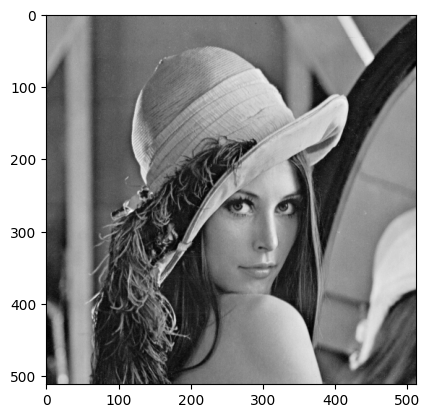

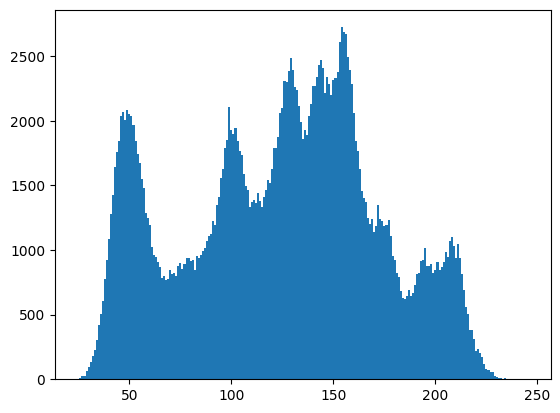

In [134]:
if student :
  img = skio.imread("images/lena.tif")
  histogram = skimage.exposure.histogram(img, 256)

#visualization
if student:
  plt.imshow(img, cmap = "gray")
  plt.show()
  plt.bar(histogram[1],histogram[0], width = 1)
  plt.show()

Here is the algorithm for histogram equalization :
- flatten the image
- compute the CDF of your image and the bins using the skimage.exposure.cumulative_distribution() function
- interpolate the values of the new pixels using the previous CDF, using np.interp()
- reshape the flat vector into an image

- **Q** :  Fill in the following code. Visualize the two images. What is the effect created on the image ? Visualize the cumulative distribution functions of the original and equalized image, to check if your equalization worked.
-**A** : The contrast increased. The cumulative distribution function for the equalized image is the identity function.
- **Q** : Visualize the histogram of the resulting image. What do you observe ?
- **A** : The histogram is spread on the entire interval [0,255] and is locally constant in some areas. We observe some oscillations.

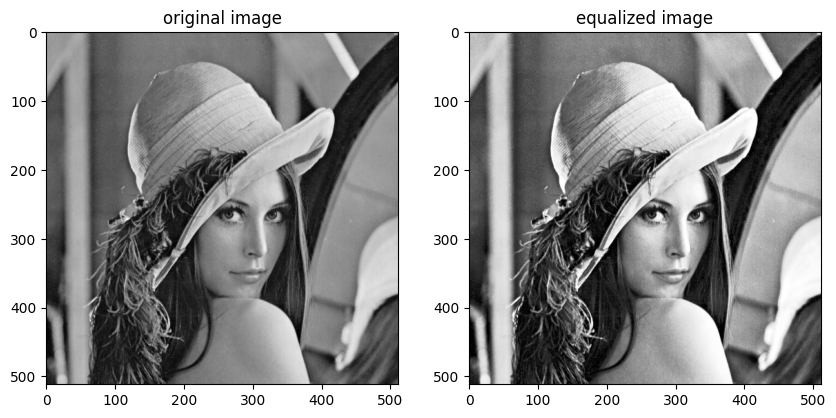

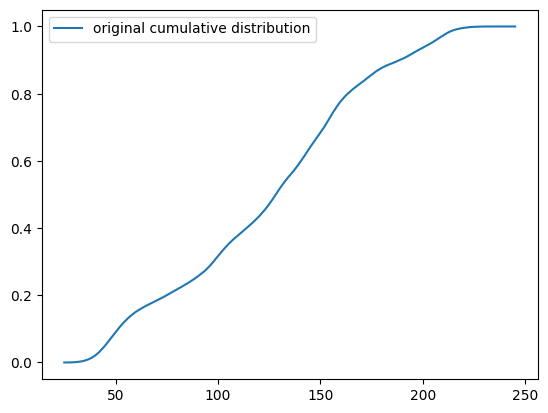

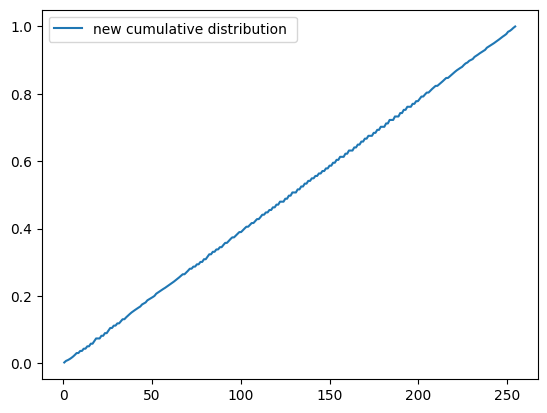

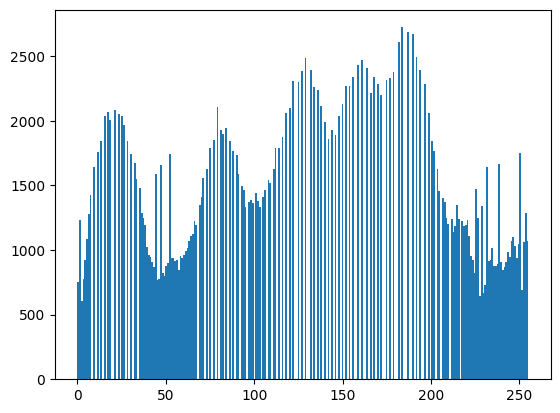

In [135]:
if student:
  flat_image = img.flatten()
  cdf,bins = skimage.exposure.cumulative_distribution(img)
  flat_new_image = np.interp(flat_image,bins,cdf) *255
  new_image = flat_new_image.reshape((img.shape[0],img.shape[1]))

# visualize the images
fig,ax = plt.subplots(1,2,figsize = (10,10))
ax[0].imshow(img, cmap = "gray")
ax[0].set_title("original image")
ax[1].imshow(new_image, cmap = "gray")
ax[1].set_title("equalized image")
plt.show()

#visualize the cdf of the original and the new image
if student :
  cdf_new,bins_new = skimage.exposure.cumulative_distribution(new_image)
plt.plot(bins,cdf,label='original cumulative distribution')

plt.legend()
plt.show()
plt.plot(bins_new,cdf_new,label='new cumulative distribution ')
plt.legend()
plt.show()

#Histogram visualization
if student :
  histogram_new = skimage.exposure.histogram(new_image, 256)
  plt.bar(histogram_new[1],histogram_new[0], width = 1)
  plt.show()

### Histogram Transfer 
Another interesting manipulation that we can is to transfer the histogram of a target image to the histogram of our source image. It can be done in color or Grey scale. One funny application is to transfer color palettes between image paintings. Here, we will do a simple example on greyscale images.

Here is the pseudo-code for that method :
- flatten both images
- get the indices of the sorted source image
- change the values of the indexed pixels of the source image with the sorted pixels of the target image
- reshape the resulting vector into an image


- **Q** Code the previous algorithm. Visualize the histogram of the resulting image and the histogram of the target image, to check if your algorithm works.
- **A**: The histogram of the resulting image is the same as the histogram of the target image.

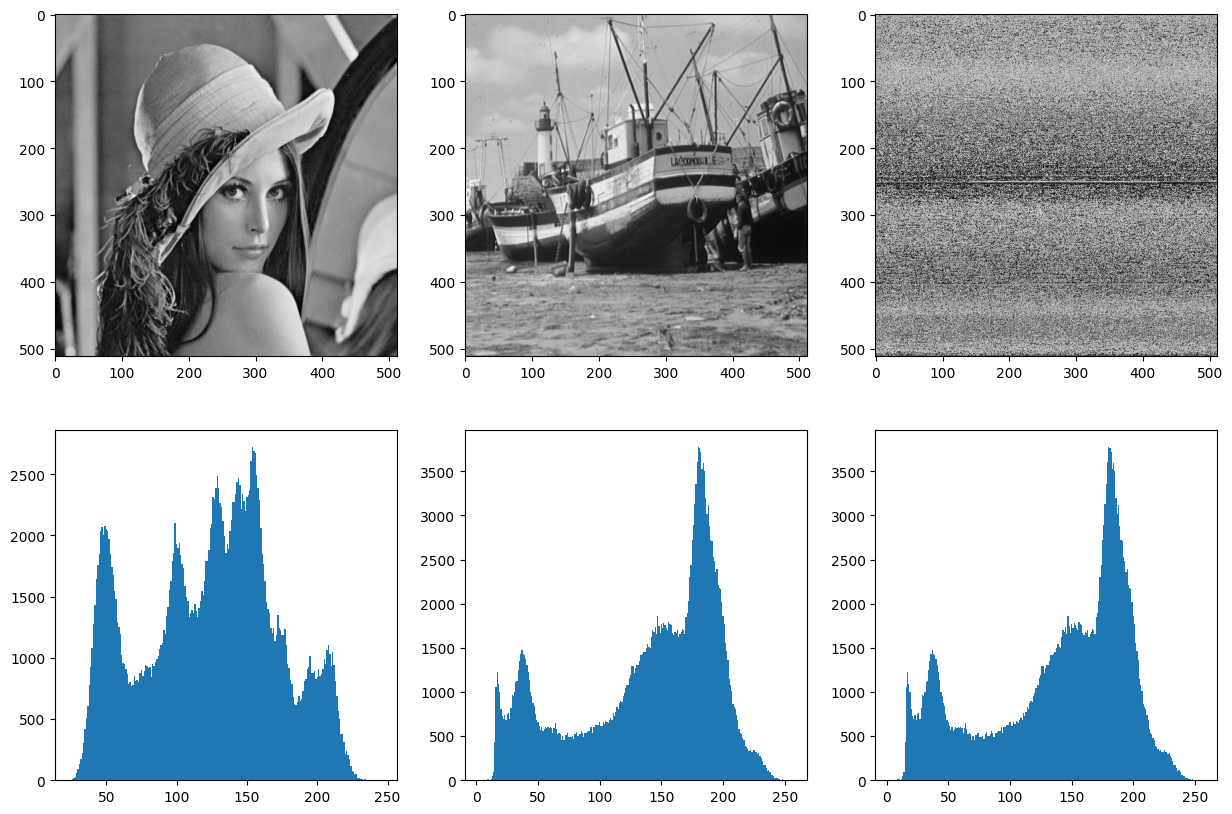

In [136]:
image_s = skio.imread("images/lena.tif")
image_t = skio.imread("images/bateau.tif")
if student:
  #flatten
  pixels_s= image_s.flatten()
  pixels_t= image_t.flatten()
  # sort
  ind = np.argsort(pixels_s)
  
  sorted_t = sorted(pixels_t)
  # change the values of pixel_s and reshape it into an image
  
  new_image = np.array([sorted_t[i] for i in ind]).reshape((image_s.shape[0],image_s.shape[1]))




# Visualization 
fig,axs = plt.subplots(2,3,figsize = (15,10))
axs[0,0].imshow(image_s,cmap = "gray")
axs[0,1].imshow(image_t,cmap = "gray")
axs[0,2].imshow(new_image,cmap = "gray")
histogram_new = skimage.exposure.histogram(new_image, 256)
histogram_t = skimage.exposure.histogram(image_t, 256)
histogram_s = skimage.exposure.histogram(image_s, 256)
axs[1,0].bar(histogram_s[1],histogram_s[0], width = 1)
axs[1,1].bar(histogram_t[1],histogram_t[0], width = 1)
axs[1,2].bar(histogram_new[1],histogram_new[0], width = 1)
plt.show()


## Color spaces
In this section we will work with  fruits.tif or fleur.tif. The following code load  the image and visualize them in RGB, and visualize the 3 color channels.


### RGB space

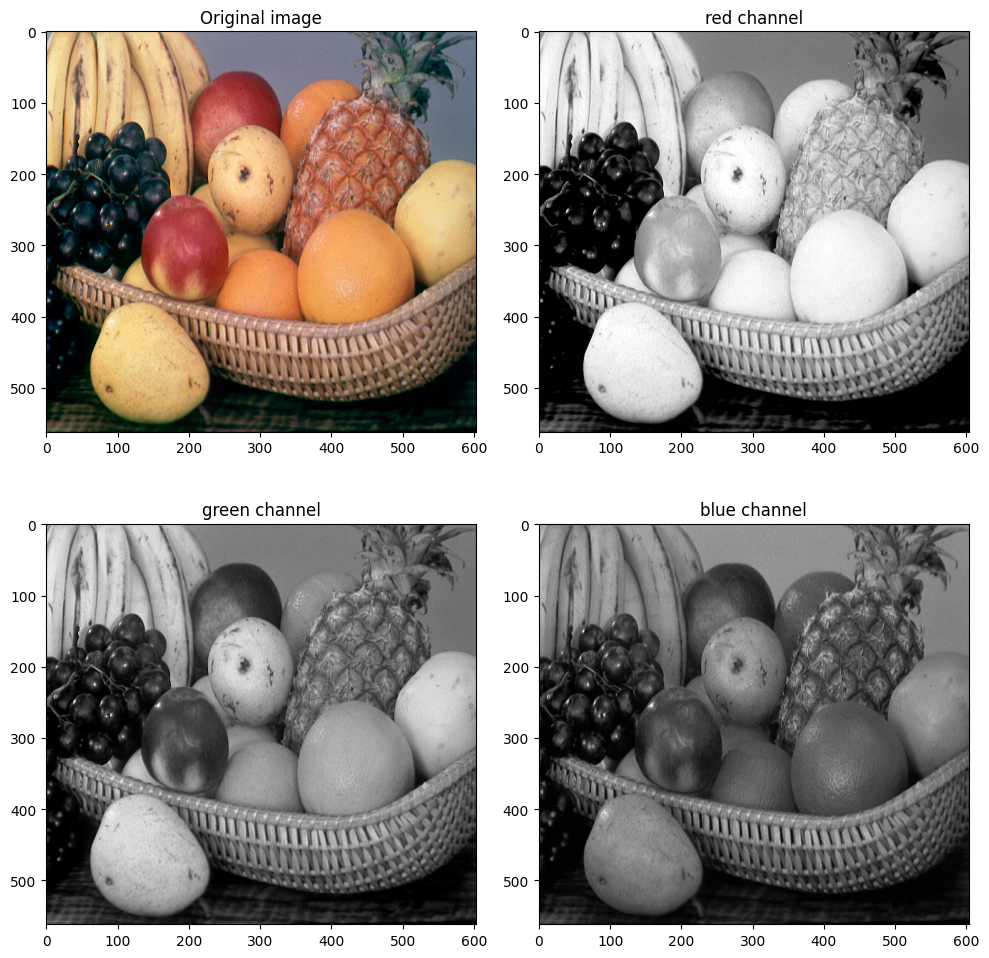

In [153]:
imrgb =skio.imread("images/fruits.tif")

# extract the three (red,green,blue) channels from imrgb and normalise between 0 and 1
if student :
  imred   = imrgb[:,:,0]
  imgreen = imrgb[:,:,1]
  imblue  = imrgb[:,:,2]


#image size 
[nrow,ncol,nch]=imrgb.shape
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#we display the images
axes[0, 0].imshow(imrgb)
axes[0,0].set_title('Original image')
axes[0, 1].imshow(imred, cmap="gray")
axes[0,1].set_title('red channel')
axes[1, 0].imshow(imgreen, cmap="gray")
axes[1,0].set_title('green channel')
axes[1, 1].imshow(imblue, cmap="gray")
axes[1,1].set_title('blue channel')
fig.tight_layout()

It might be useful to convert the color image to gray level. This can be done by averaging the three channels, or by computing another well chosen linear combination of the coordinates R, G and B. The convention for this linear combination is Y = 0.2125 R + 0.7154 G + 0.0721 B.
Observe the difference between the simple average and this linear combination.

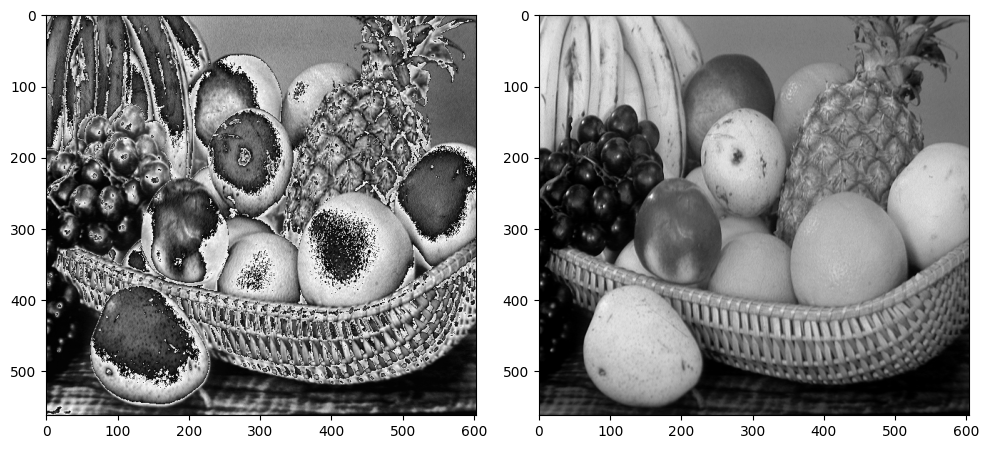

In [138]:
if student:
  img_mean= (imred+imgreen+imblue)/3
  img_lin= 0.2125 *imred+0.7154*imgreen+0.0721*imblue


fig,ax = plt.subplots(1,2,figsize=(10, 10))
ax[0].imshow(img_mean,cmap='gray')
ax[1].imshow(img_lin,cmap='gray')
fig.tight_layout()

### Oponent spaces
Color opponent spaces are characterized by a channel representing an
achromatic signal, as well as two channels encoding color
opponency. The two chromatic channels generally represent an
approximate red-green opponency and yellow- blue opponency. 
$$ O_1 = \frac 1 {\sqrt{2}} (R-G),\;  O_2 =  \frac 1 {\sqrt{6}}
(R+G-2B),\; O_3 = \frac 1 {\sqrt{3}} (R+G+B)$$

- Display the O_1, O_2 and O_3 coordinates for different color images.

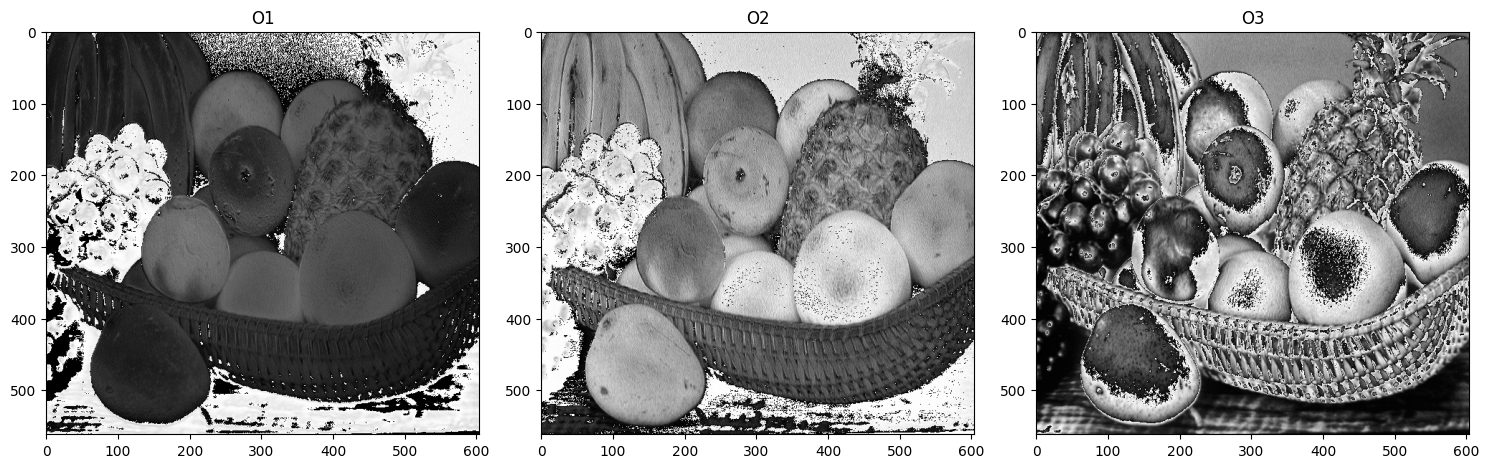

In [139]:
if student:
  O1 = (imred-imgreen)/np.sqrt(2)
  O2 = (imred+imgreen-2*imblue)/np.sqrt(6)
  O3 = (imred+imgreen+imblue)/np.sqrt(3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axes[0].imshow(O1, cmap='gray')
axes[0].set_title('O1')
axes[1].imshow(O2, cmap='gray')
axes[1].set_title('O2')
axes[2].imshow(O3, cmap='gray')
axes[2].set_title('O3')
fig.tight_layout()

### HSV / HSL / HSI spaces (Hue, Saturation, Value / Luminance /Intensity)
These colorspaces are obtained by a non-linear transformation of the
RGB coordinates into polar coordinates. The luminance (or value V)
corresponds to the vertical axis of the cylinder; the hue corresponds to the
angular coordinate and the saturation to the distance from the axis.
See https://en.wikipedia.org/wiki/HSL_and_HSV for more details.


The conversion from RGB to HSI boils down to 
$$ H=atan\left(\frac{O_1}{O_2}\right),\;S=\sqrt{O_1^2+O_2^2},\; I=0_3$$

 - Display the H, S and I coordinates coordinates for a given color image.

C:\Users\Dell\AppData\Local\Temp\ipykernel_12280\4043320089.py:2: RuntimeWarning: divide by zero encountered in divide
  H=np.arctan(O1/O2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12280\4043320089.py:2: RuntimeWarning: invalid value encountered in divide
  H=np.arctan(O1/O2)


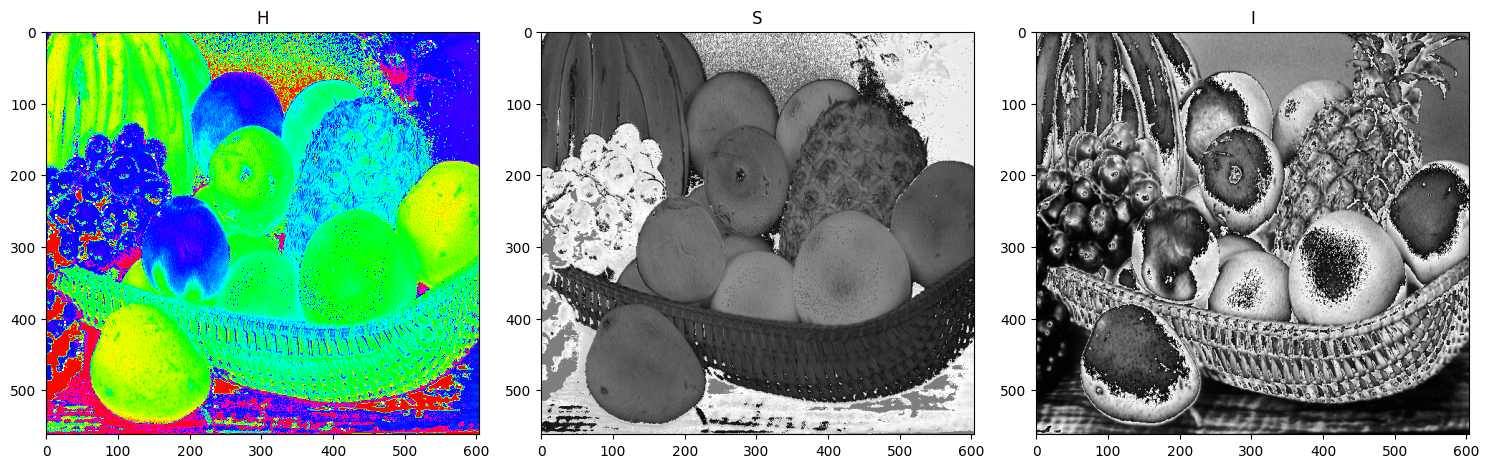

In [140]:
if student:
  H=np.arctan(O1/O2)
  S=np.sqrt(O1**2+O2**2)
  I=O3

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

axes[0].imshow(H, cmap='hsv')
axes[0].set_title('H')
axes[1].imshow(S, cmap='gray')
axes[1].set_title('S')
axes[2].imshow(I, cmap='gray')
axes[2].set_title('I')
fig.tight_layout()

The conversion from RGB to HSV is a little bit more complex, you can use the function `color.rgb2hsv` from skimage.

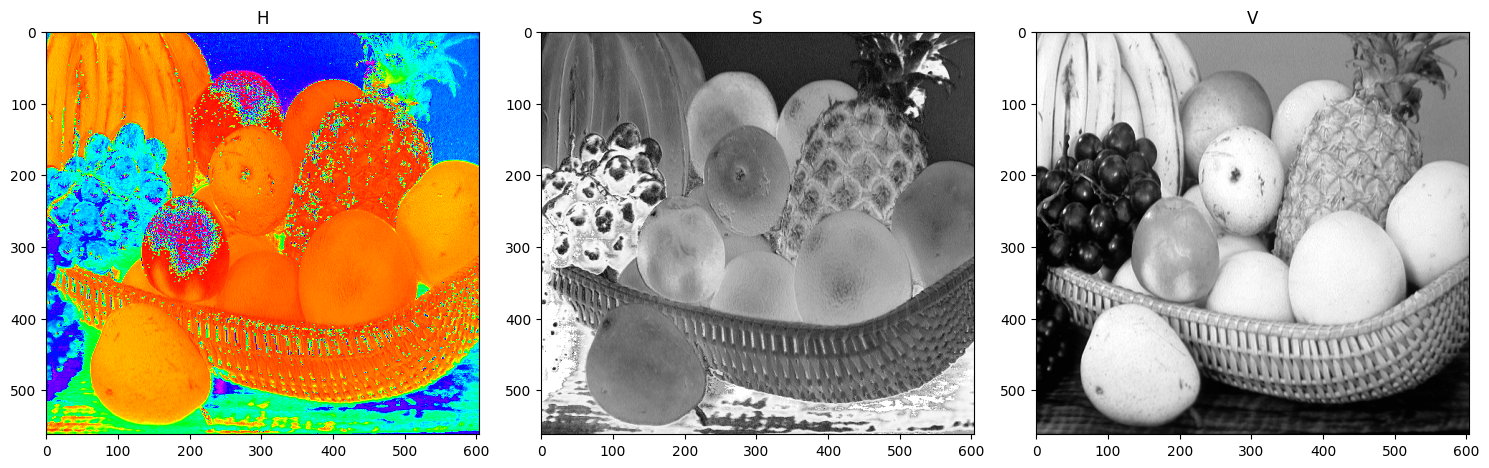

In [141]:
if student :
  imhsv = skimage.color.rgb2hsv(imrgb)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

axes[0].imshow(imhsv[:,:,0], cmap='hsv')
axes[0].set_title('H')
axes[1].imshow(imhsv[:,:,1], cmap='gray')
axes[1].set_title('S')
axes[2].imshow(imhsv[:,:,2], cmap='gray')
axes[2].set_title('V')
fig.tight_layout()

 - Reconstruct and display the RGB image after the following
      transformations :
      + saturation reduction (apply an offset to the saturation channel) 
      + rotation of the hue channel
      + gamma transformation on the luminance
($ x\mapsto x^\gamma $ with $\gamma <1$)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12280\1398963231.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  res[:,:,0]=res[:,:,0]*np.exp(j*2*np.pi*angle)


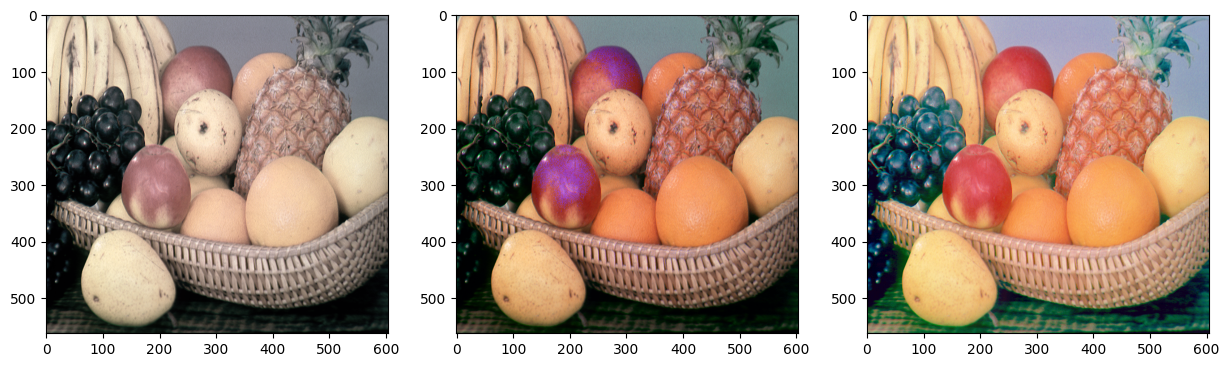

In [142]:
def saturation_reduction(imhsv,alpha):
  # alpha must be larger than one
  res = imhsv.copy()
  if student:
    res[:,:,1]=res[:,:,1]/alpha
  return(res)
    
def hue_rotation(imhsv,angle):
  # angle must be in the [0,1] range
  res = imhsv.copy()
  if student:
    j=complex(0,1)
    res[:,:,0]=res[:,:,0]*np.exp(j*2*np.pi*angle)
  return(res)
  
def gamma_transformation(imhsv,gamma):
  # gamma must be in the ]0,1[ range
  res = imhsv.copy()
  if student:
    res[:,:,2]=res[:,:,2]**gamma
  return(res)

# try out different parameters
img_saturation = skimage.color.hsv2rgb(saturation_reduction(imhsv,2))
img_hue_r = skimage.color.hsv2rgb(hue_rotation(imhsv,0.1))
img_gamma = skimage.color.hsv2rgb(gamma_transformation(imhsv,1/2.2))

#visualization
fig,axs = plt.subplots(1,3,figsize = (15,5)) 
axs[0].imshow(img_saturation)
axs[1].imshow(img_hue_r)
axs[2].imshow(img_gamma)
plt.show()

## Classification

### Binary classification
In this section we will separate pixels of an image in two classes using the K-means algorithm. Classifying pixel in classes is known as semantic segmentation, and is very important in many applications such as medical imaging analysis or self-driving cars. For example, know what a cell pixel or a background pixel looks like. For self-driving cars it is important to know what is a pedestrian and what is not a pedestrian.
We will do a very basic classification on the `cell.tif` image.



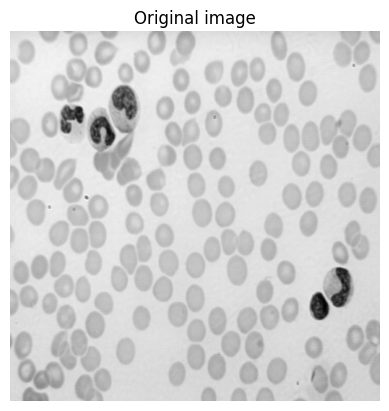

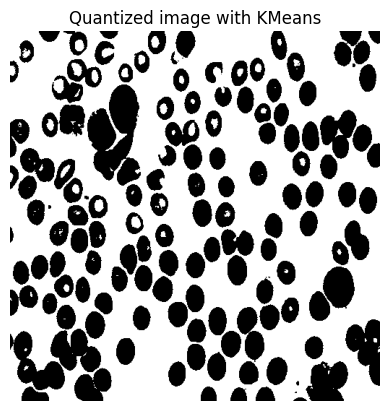

In [143]:
img=skio.imread('images/cell.tif')
img = np.array(img, dtype=np.float64) / 255
if student :
  n_class = 2
  image_array = img.flatten()
  # fit the model on a randomly sampled subset of the image_array of 1000 points, using shuffle
  training_set = shuffle(image_array,n_samples=1000).reshape(-1,1)
  kmeans = KMeans(n_clusters=n_class,n_init='auto').fit(training_set)
  # predict the labels for all points
  labels = kmeans.predict(image_array.reshape(-1,1))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(img,cmap='gray')

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image with KMeans')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, img.shape[0], img.shape[1]),cmap='gray')
plt.show()

### Color distributions and color quantization using classification
In this section we will use classification algorithms to quantize an image in a limited number of colors.
We will now display the color distribution of an RGB image as a 3D point cloud. If the image is large, the point cloud will be too dense for vizualization. A solution is to subsample randomly this point cloud for vizualization. 

(3000, 3)


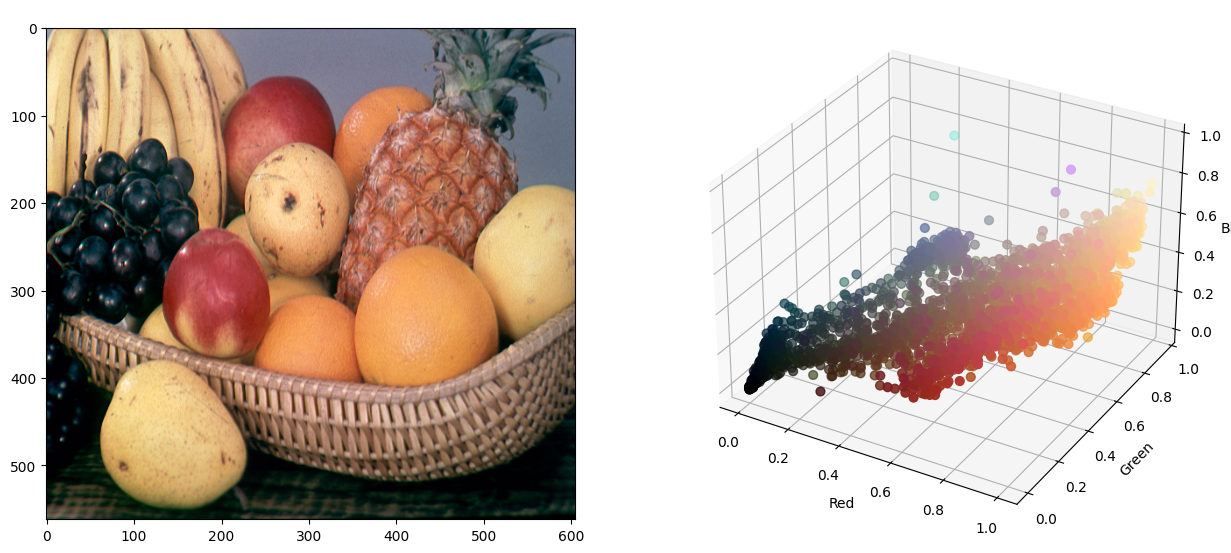

In [144]:
imrgb =skio.imread("images/fruits.tif")
fig = plt.figure(figsize=(15, 7))
axis = fig.add_subplot(1, 2, 1)
axis.imshow(imrgb)
[nrow,ncol,nch]=imrgb.shape
X = imrgb.reshape((nrow*ncol,3))
nb = 3000
idx = np.random.randint(X.shape[0], size=(nb,))
Xs = X[idx, :]/255.
print(Xs.shape)

axis = fig.add_subplot(1, 2, 2, projection="3d")

axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(Xs[:, 0], Xs[:,1],Xs[:, 2],c=Xs, s=40)
plt.show()

In order to limit the size of an image for memory problems, one solution is to quantize the image, that is to limit the number of possible colors to a very limited number. In the following cell you will code a quantization algorithm based on Kmeans. Kmeans is an unsupervised learning algorithm, that clusters pointclouds together, based on their position in the color space. 
The algorithm is the following :
- reshape the image into an array of shape (h*w,3)
- train the Kmeans model of `scikit-learn` on a subset of the pixels
- predict the labels of those pixels with `kmeans.predict` function
- get the colors of the clusters using `kmeans.cluster_centers_`

Once everything is done you can run the code and visualize the results.


(339448,)
(30, 3)


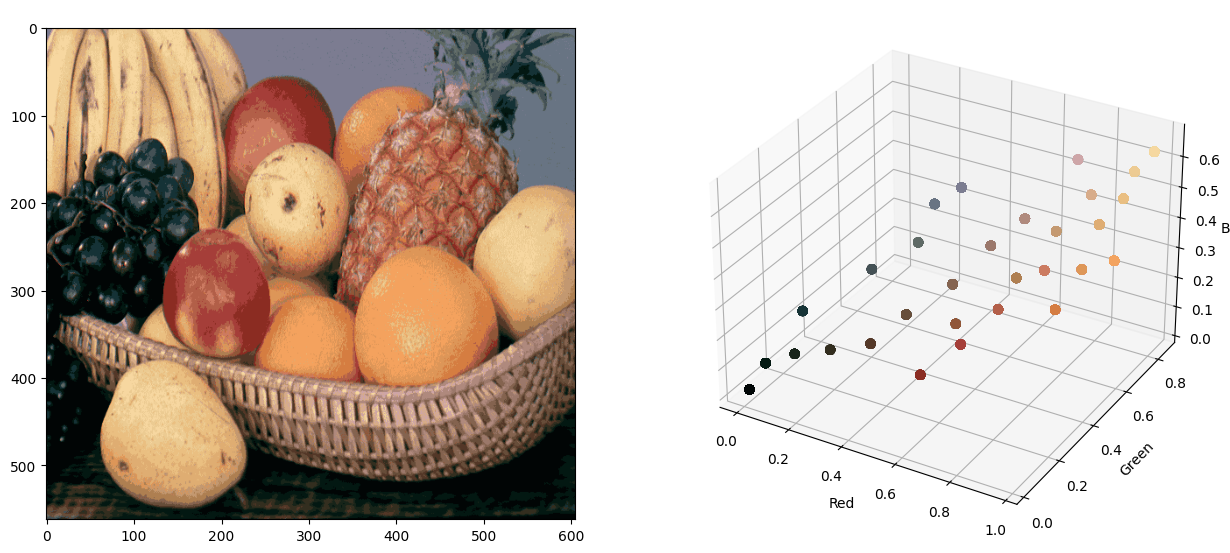

In [145]:
k = 30 # number of classes
def color_quantization_with_kmeans(imrgb,k):
  if student:
    # turn the image into an array of shape (h*w,3)
    [nrow,ncol,nch]=imrgb.shape

    vec_img = imrgb.reshape((nrow*ncol,3))
    #fit the model on a randomly sampled subset of 1000 data points
    train_set = shuffle(vec_img,n_samples=1000)
    kmeans = KMeans(n_clusters=k,n_init='auto').fit(train_set)
    # predict the labels of each pixel
    labels = kmeans.predict(vec_img)
    # get the color values of each cluster by getting the centroids
    colors = kmeans.cluster_centers_
  return(labels,colors)

# Extract the labels and the values of the colors of each cluster
labels,colors = color_quantization_with_kmeans(imrgb,30)
print(labels.shape)
print(colors.shape)


# don't modify this code
def visualize_quantization(shape,labels,colors):
  new_image = np.zeros(shape)
  label_matrix = labels.reshape(shape[0],shape[1])
  for i in range(shape[0]):
    for j in range(shape[1]):
      new_image[i,j,:] = colors[label_matrix[i,j]]
      
  # visualization
  fig = plt.figure(figsize=(15, 7))
  axis = fig.add_subplot(1, 2, 1)
  axis.imshow(np.uint8(new_image))
  [nrow,ncol,nch]=imrgb.shape
  X = new_image.reshape((nrow*ncol,3))
  nb = 3000
  idx = np.random.randint(X.shape[0], size=(nb,))
  Xs = X[idx, :]/255.

  axis = fig.add_subplot(1, 2, 2, projection="3d")

  axis.set_xlabel("Red")
  axis.set_ylabel("Green")
  axis.set_zlabel("Blue")
  axis.scatter(Xs[:, 0], Xs[:,1],Xs[:, 2],c=Xs, s=40)
  plt.show()

# visualize the quantized image
visualize_quantization(imrgb.shape,labels,colors) 


## K-Means from scratch
In this part, we will try to code K-means from scratch. We will see if our algorithm works as well as the one of scikit-learn.

### Initialization
Create k random points in the RGB space. Those will be the initial centroids

### Loop
- Compute the distances of every pixel to the centroids in a distance vector for each centroid
- For each point, find which centroid is the closest and attribute it to the cluster of the corresponding centroid.
- Update the value of the centroids, by computing the mean value across the points in the cluster
- repeat this loop until convergence 

Fill in the following functions and try to run the code. How many iterations are needed to converge to a stable solution ?  

The number of iterations needed is different each time we run the algorithm because it depends on how we choose the initial centroids. However, if we repeat this process many times, we observe that approximately we need 20 iterations.


(339448, 3)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


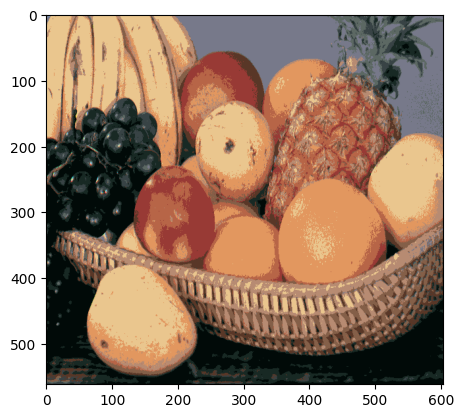

In [147]:
# coding k-means from scratch
img =skio.imread("images/fruits.tif")
## reshape the image in a 2D vector
img_flat = img.reshape((img.shape[0]*img.shape[1],img.shape[2]))
print(img_flat.shape)


###### USEFUL FUNCTIONS ######
def distance(X,c):
  # compute the euclidian distance vector between each point of flat RGB image and a centroid of size 3
  # the output should be of size (X.shape[0],)
  if student :
    dist_vec = np.sqrt(np.sum(np.square(X-c),axis=-1))
  return dist_vec

def initialize_centroids(k):
  # create an array of size (k,3) of random values between 0 and 255
  if student :
    centroids = np.random.randint(256,size=(k,3))
  return centroids

def compute_clusters(X, centroids):
  k = centroids.shape[0]

  # initialize a distance vector that stores the distance of each point of X to the k centroids
  distance_vectors = np.zeros((X.shape[0],k))

  # initialize a list of k empty lists that will contain the points associated to the clusters
  clusters = [[] for i in range(k)]

  # compute the distances
  for c in range(k):
    if student:
      distance_vectors[:,c] = distance(X,centroids[c])

  #associate each point to its corresponding cluster
  for i in range(X.shape[0]):
    if student :
      # what is the closest cluster c to point X[i] ?
    
      c = np.argmin(distance_vectors[i])
      
      #update cluster[c]
      clusters[c].append(X[i])
  return(clusters)
  
def update_centroids(centroids,clusters):
  ### once the clusters are computed we can update the value of the centroids
  k = centroids.shape[0]
  new_centroids  = np.copy(centroids)
  for i in range(k):
    # if no point were attributed to that cluster don't change its value, otherwise use the mean of all points in the cluster
    if len(clusters[i])!=0:
      if student : 
        new_centroids[i]=np.mean(clusters[i],axis=0)
  return(new_centroids)
####################################

###### k-means algorithm training ######
## define the number of clusters and the number of iterations
k = 30
steps = 50

## initialize the centroids by randomly sampling the RGB space
centroids = initialize_centroids(k)

# train the k-means on a subset of the points
points = shuffle(img_flat, random_state = 0)[0:1000]
### K-means iterations
for i in range(steps):
  print(i)
  # compute the clusters
  clusters = compute_clusters(points,centroids)
  # update the centroids
  new_centroids = update_centroids(centroids,clusters)

  # if the centroid dont change break, otherwise update the centroid variable
  if np.linalg.norm(centroids-new_centroids)==0:
    break
  else:
    centroids = new_centroids
####################################

###### k-means algorithm prediction ######
def predict_kmeans(X,centroids):
  new_vec = np.zeros(X.shape)
  k = centroids.shape[0]
  distance_vectors = np.zeros((X.shape[0],k))
  clusters = [[] for i in range(k)]
  for c in range(k):
    if student:
      distance_vectors[:,c] = distance(X,centroids[c])
  for i in range(X.shape[0]):
    if student : 
      c = np.argmin(distance_vectors[i,:])
      new_vec[i,:] = centroids[c]
  return(new_vec)

############### Visualize the final image #####################
vec = predict_kmeans(img_flat,centroids)

image = vec.reshape((img.shape[0],img.shape[1],img.shape[2]))
plt.imshow(np.uint8(image))
plt.show()